### Домашнее задание к занятию "Классификация: Логистическая регрессия и SVM"

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###### Пропущенные значения обозначены вопросами - заменяем на null

In [7]:
df.replace(['?'], [None], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###### Удаляем все строки с пустыми ячейками

In [9]:
df.dropna(inplace=True)

In [10]:
df.reset_index(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            45222 non-null  int64 
 1   age              45222 non-null  int64 
 2   workclass        45222 non-null  object
 3   fnlwgt           45222 non-null  int64 
 4   education        45222 non-null  object
 5   educational-num  45222 non-null  int64 
 6   marital-status   45222 non-null  object
 7   occupation       45222 non-null  object
 8   relationship     45222 non-null  object
 9   race             45222 non-null  object
 10  gender           45222 non-null  object
 11  capital-gain     45222 non-null  int64 
 12  capital-loss     45222 non-null  int64 
 13  hours-per-week   45222 non-null  int64 
 14  native-country   45222 non-null  object
 15  income           45222 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


###### Потеряли около 3.5к записей - это менее 10%.

In [12]:
df.describe()

,index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,24433.151563,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,14092.966862,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,12206.250000,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,24470.000000,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,36629.750000,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.head(10)

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


###### Разобьем данные на X и y

In [15]:
X = df.loc[:, df.columns != 'income']

In [16]:
y = df[df.columns[-1]]

###### Посмотрим, какие значения принимает целевой атрибут

In [17]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

###### Заменим в целевом атрибуте '>50K' на 1 и '<=50K' на 0

In [18]:
y.replace('>50K', 1, inplace=True)
y.replace('<=50K', 0, inplace=True)

###### Разделим выборку на тренировочную и валидационную.

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

###### Разделим признаки на числовые и категориальные

In [20]:
num_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

###### Получим список значений для всех категорий, для OneHotEncoder-а

In [21]:
def get_cat_categories(df, cat_columns):
    categories = []
    for column in cat_columns:
        categories.append(list(df[column].unique()))    
    return categories

In [22]:
categories = get_cat_categories(df, cat_columns)

###### Категориальные признаки обрабатываем OneHotEncoder-ом, численные пропускаем через StandardScaler



In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(categories=categories), cat_columns),
        ('num', StandardScaler(), num_columns)
    ],
    sparse_threshold=0,
    remainder='drop'
)

###### Соберем Pipeline 

In [24]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

###### А теперь все это запихнем в GridSearch

In [26]:
grid_params = {
    'classifier__C': np.logspace(-3, 3, 7),
    'classifier__penalty': ['l1', 'l2']
}

In [28]:
grid = GridSearchCV(clf, param_grid=grid_params, n_jobs=-1, cv=10)

In [29]:
grid.fit(X, y)

C:\Users\Alexey_Korobzev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         OneHotEncoder(categories=[['Private',
                                                                                                    'Local-gov',
                                                                                                    'Self-emp-not-inc',
                                                                                                    'Federal-gov',
              

In [30]:
grid.best_score_

0.8484588133402005

In [31]:
grid.best_params_

{'classifier__C': 1.0, 'classifier__penalty': 'l2'}

In [32]:
model = grid.best_estimator_

###### Смотрим на остатки 

In [33]:
model.named_steps['classifier'].intercept_

array([-1.56791089])

###### Заберем название фичей из препроцессора

In [34]:
def get_feature_names(column_transformer, df):
    feature_names = []
    for _, tr, columns in column_transformer.transformers:
        if type(tr).__name__ == 'OneHotEncoder':
            tr.fit(df[columns]) # wtf?? удивительно, но факт, но ColumnTransformer сначала клонирует незафиченный непосредственно трансформер, а потом его выполняет
            feature_names.extend(list(tr.get_feature_names(columns)))
        elif type(tr).__name__ == 'StandardScaler':
            feature_names.extend(columns)
        else:
            raise RuntimeError(f'Unknown class: {type(tr).__name__}, plrase update function')
    return feature_names

In [35]:
feature_names = get_feature_names(model.named_steps['preprocessor'], X)

In [36]:
len(feature_names)

104

In [37]:
df_coef = pd.DataFrame()
df_coef['Features'] = pd.Series(feature_names)
df_coef['Coef'] = model.named_steps['classifier'].coef_[0]

###### Смотрим на максимально влияющие признаки

In [38]:
df_coef.sort_values(by=['Coef']).head(10)

,Features,Coef
71,native-country_Columbia,-1.558329
40,occupation_Priv-house-serv,-1.383743
23,marital-status_Never-married,-1.196550
70,native-country_South,-1.127864
44,relationship_Own-child,-0.939994
69,native-country_Vietnam,-0.920221
31,occupation_Farming-fishing,-0.918394
56,gender_Female,-0.873510
33,occupation_Other-service,-0.829839
26,marital-status_Separated,-0.783736


In [39]:
df_coef.sort_values(by=['Coef'], ascending=False).head(10)

,Features,Coef
101,capital-gain,2.377533
29,marital-status_Married-AF-spouse,1.525871
24,marital-status_Married-civ-spouse,1.399853
82,native-country_Portugal,0.892236
48,relationship_Wife,0.861534
62,native-country_Ireland,0.856416
37,occupation_Exec-managerial,0.816888
96,native-country_France,0.815579
80,native-country_Italy,0.755300
74,native-country_Cambodia,0.746275


###### Валидационная выборка.

In [40]:
y_pred = model.predict(X_val)

In [41]:
model.score(X_val, y_val)

0.8503040353786623

###### Нарисуем ROC AUC

In [42]:
def plt_roc_auc(title, fpr_train, tpr_train, roc_auc_train, fpr_test, tpr_test, roc_auc_test):
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_train, tpr_train, label=f'Train ROC AUC {roc_auc_train}')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC AUC {roc_auc_test}')
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

In [43]:
y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:, 1]
y_prob = model.predict_proba(X_val)[:, 1]

In [45]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_val, y_prob)
roc_auc_train = roc_auc_score(y_train, y_prob_train)
roc_auc_test = roc_auc_score(y_val, y_prob)

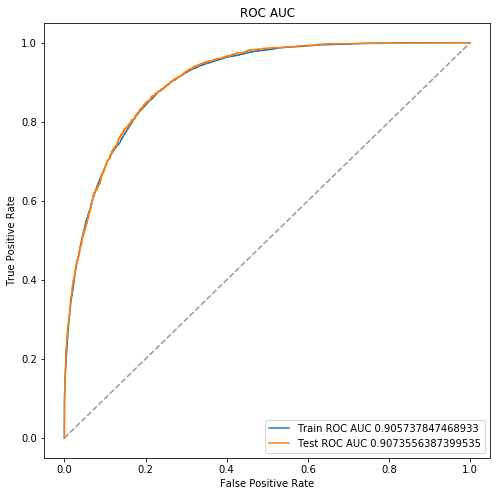

In [46]:
plt_roc_auc('ROC AUC', fpr_train, tpr_train, roc_auc_train, fpr_test, tpr_test, roc_auc_test)